In [1]:
from pysqlite2 import dbapi2 as sql
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
db = "/home/eric/Documents/franklin/narsc2018/generated_data/narsc18.sqlite"
con = sql.connect(db)
con.enable_load_extension(True)
con.execute("SELECT load_extension('mod_spatialite');")

qry = '''
SELECT A.*, 
B.CL8AA1990 AS pop90,
B.CL8AA2000 AS pop00,
B.CL8AA2010 AS pop10,
C.metro_status,
C.economic_type_label,
C.state, C.county_name,
D.entropy_index_10 AS seg_10,
D.entropy_index_00 AS seg_00,
D.entropy_index_90 AS seg_90,
E.entropy_index_10 AS seg2_10,
E.entropy_index_00 AS seg2_00,
E.entropy_index_90 AS seg2_90,
F.gini_10, F.gini_00, F.gini_90
FROM county_diversity AS A JOIN nhgis_pop_race_norm_90_10 AS B
ON A.GISJOIN = B.GISJOIN
JOIN usda_typology_2015 AS C ON B.STATEA || B.COUNTYA = C.fips
JOIN county_entropy_index AS D ON A.GISJOIN = D.GISJOIN
JOIN county_entropy_index_3_groups AS E ON A.GISJOIN = E.GISJOIN
JOIN county_gini AS F ON A.GISJOIN = F.GISJOIN
;
'''
df = pd.read_sql(qry, con, index_col='GISJOIN')
con.close()
df.head()

,pwhite_10,pblack_10,pasian_10,phisp_10,pother_10,theil_10,theil2_10,total_10,total2_10,pwhite_00,...,county_name,seg_10,seg_00,seg_90,seg2_10,seg2_00,seg2_90,gini_10,gini_00,gini_90
GISJOIN,,,,,,,,,,,,,,,,,,,,,
G0100010,0.772462,0.175826,0.008961,0.024005,0.004801,0.662470,0.456962,54571,53059,0.797373,...,Autauga County,0.119872,0.191369,0.273471,0.086409,0.132727,0.191206,0.449228,0.435732,0.421720
G0100030,0.835048,0.093084,0.007785,0.043848,0.007632,0.583661,0.400694,182265,177158,0.860791,...,Baldwin County,0.142878,0.202772,0.285886,0.093032,0.120501,0.175825,0.460482,0.440738,0.425888
G0100050,0.467531,0.466912,0.004771,0.050515,0.002659,0.903147,0.859725,27457,27044,0.509257,...,Barbour County,0.139656,0.116351,0.144763,0.138036,0.119128,0.137718,0.502484,0.508892,0.466285
G0100070,0.750207,0.219245,0.001266,0.017718,0.003666,0.648795,0.489361,22915,22621,0.762032,...,Bibb County,0.166713,0.161091,0.109452,0.121234,0.107770,0.069454,0.452703,0.447818,0.433071
G0100090,0.888873,0.012630,0.002320,0.080702,0.005582,0.406089,0.386048,57322,56302,0.921117,...,Blount County,0.119005,0.148188,0.243028,0.105742,0.101755,0.078095,0.443153,0.434531,0.420266


In [3]:
len(df)

2403

In [4]:
df[['seg_10', 'seg_00', 'seg2_10', 'seg2_00']].describe()

,seg_10,seg_00,seg2_10,seg2_00
count,2403.000000,2403.000000,2403.000000,2403.000000
mean,0.127557,0.146621,0.101455,0.110219
std,0.080795,0.091473,0.085377,0.094421
min,0.010692,0.013316,0.002536,0.004417
25%,0.065008,0.076772,0.035595,0.038094
50%,0.107297,0.123306,0.075264,0.080253
75%,0.172227,0.198916,0.140685,0.152869
max,0.518378,0.573981,0.551412,0.613096


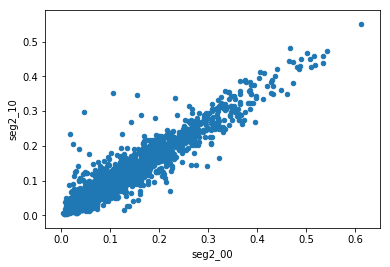

In [5]:
# plot 3 group entropy index in 2000 against 2010 values
df.plot.scatter('seg2_00', 'seg2_10')

In [6]:
# calc pop change
df['ppctchg_0010'] = ( df['pop10'] - df['pop00'] ) * 1.0 / df['pop00'] * 100
df['ppctchg_9000'] = ( df['pop00'] - df['pop90'] ) * 1.0 / df['pop90'] * 100

# calc diff in seg
df['seg_diff_00_10'] = df['seg_10'] - df['seg_00']
df['seg_pctchg_00_10'] = (df['seg_10'] - df['seg_00']) * 1.0 / df['seg_00'] * 100

df['seg2_diff_00_10'] = df['seg2_10'] - df['seg2_00']
df['seg2_pctchg_00_10'] = (df['seg2_10'] - df['seg2_00']) * 1.0 / df['seg2_00'] * 100

In [7]:
print len(df.loc[df['ppctchg_0010']<0])
print len(df.loc[df['ppctchg_9000']<0])

645
350


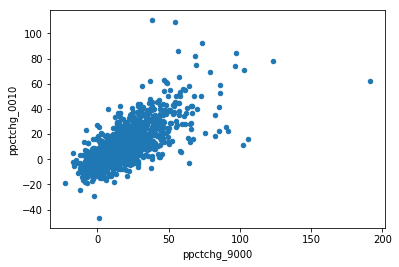

In [8]:
df.plot.scatter('ppctchg_9000', 'ppctchg_0010')

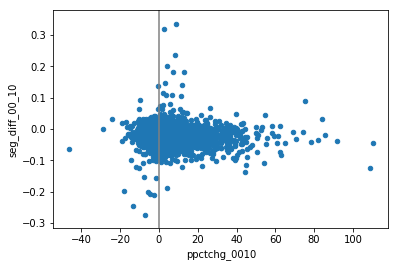

In [9]:
# plot 5 group entropy index against pop change
ax=df.plot.scatter('ppctchg_0010', 'seg_diff_00_10')
ax.axvline(x=0, color='gray')

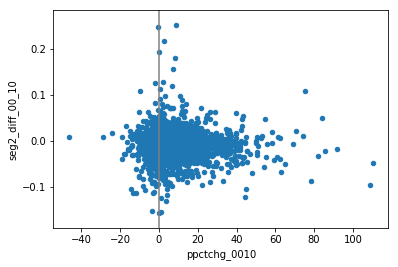

In [10]:
# plot 3 group entropy index against pop change
ax=df.plot.scatter('ppctchg_0010', 'seg2_diff_00_10')
ax.axvline(x=0, color='gray')

/home/eric/anaconda2/envs/geo/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


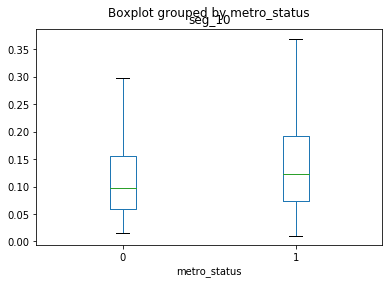

In [11]:
# compare segregation by metro status 
df.boxplot('seg_10', by='metro_status', showfliers=False, grid=False)

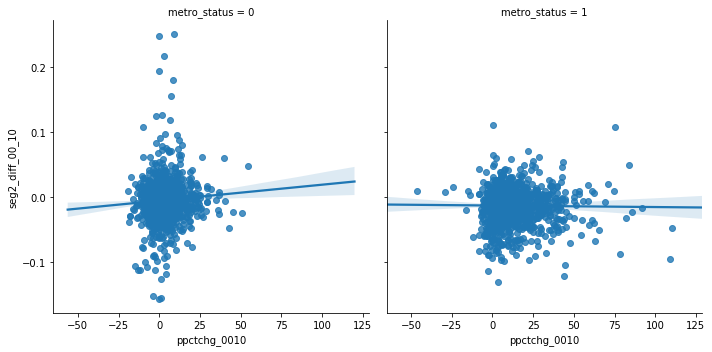

In [12]:
# separate metro status in plot of pop change against change in segregation
sns.lmplot('ppctchg_0010', 'seg2_diff_00_10', df, col='metro_status')

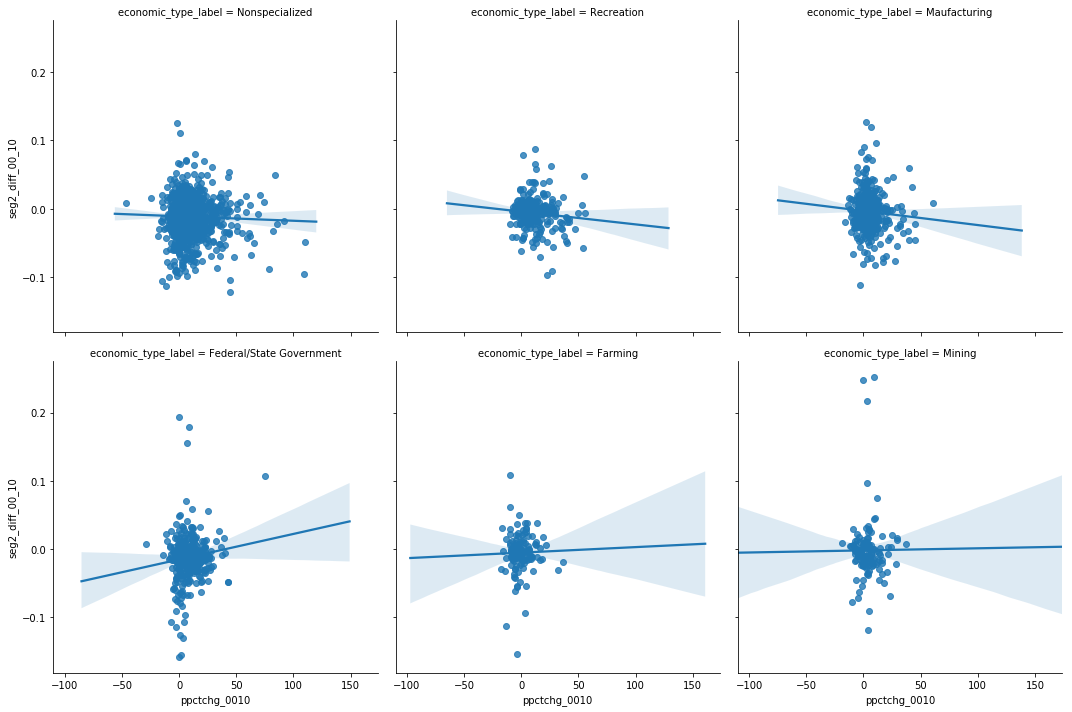

In [13]:
# separate by industry
sns.lmplot('ppctchg_0010', 'seg2_diff_00_10', df, col='economic_type_label', col_wrap=3)

## add census divisions

In [14]:
db = "/home/eric/Documents/franklin/narsc2018/generated_data/narsc18.sqlite"
con = sql.connect(db)
con.enable_load_extension(True)
con.execute("SELECT load_extension('mod_spatialite');")

qry = '''
SELECT A.gisjoin, B.name AS div
FROM us_county_2010 AS A, census_regions_10 AS B
WHERE ST_Contains(B.geometry, ST_Centroid(A.geometry))
AND A.ROWID IN (SELECT ROWID FROM SpatialIndex
    WHERE f_table_name = 'us_county_2010' AND search_frame = B.geometry )
;
'''

df2 = pd.read_sql(qry, con, index_col='gisjoin')
con.close()
df2.head()

,div
gisjoin,
G3400170,Northeast
G3400110,Northeast
G2300190,Northeast
G5000090,Northeast
G5000110,Northeast


In [15]:
df = pd.merge(df, df2, left_index=True, right_index=True)

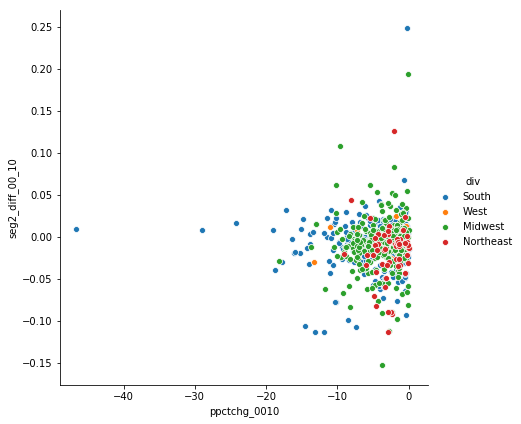

In [16]:
sns.pairplot(x_vars=['ppctchg_0010'], 
             y_vars=['seg2_diff_00_10'], 
             data=df.loc[df['ppctchg_0010'] < 0], 
             hue='div',
             height=6)

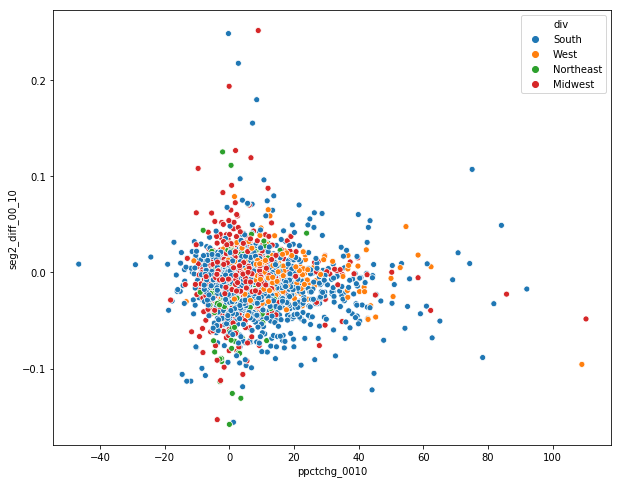

In [17]:
w = 10
h = w * .8
f, ax = plt.subplots(figsize=(w, h))
sns.scatterplot(x='ppctchg_0010', 
                y='seg2_diff_00_10', 
                data=df,
                hue='div',
                ax=ax
               )

In [18]:
# recreate table 3 from Bellman et al paper, though thresholds for growing, stable, etc, must differ

# create categories for pop change

df['growth_cat'] = 0
df.loc[df['ppctchg_0010'] >= 5, 'growth_cat'] = 'growing'
df.loc[(df['ppctchg_0010'] < 5) & (df['ppctchg_0010'] >= 0 ), 'growth_cat'] = 'stable'
df.loc[df['ppctchg_0010'] < 0, 'growth_cat'] = 'shrinking'

df.groupby('growth_cat').size()

growth_cat
growing      1134
shrinking     642
stable        622
dtype: int64

In [19]:
# how does this compare to growth counties 1990 to 2000?
df['growth_cat2'] = 0
df.loc[df['ppctchg_9000'] >= 5, 'growth_cat2'] = 'growing'
df.loc[(df['ppctchg_9000'] < 5) & (df['ppctchg_9000'] >= 0 ), 'growth_cat2'] = 'stable'
df.loc[df['ppctchg_9000'] < 0, 'growth_cat2'] = 'shrinking'

df.groupby('growth_cat2').size()

growth_cat2
growing      1648
shrinking     349
stable        401
dtype: int64

In [20]:
pd.crosstab(df['growth_cat2'], df['growth_cat'], margins=True)

growth_cat,growing,shrinking,stable,All
growth_cat2,,,,
growing,1066,190,392,1648
shrinking,25,254,70,349
stable,43,198,160,401
All,1134,642,622,2398


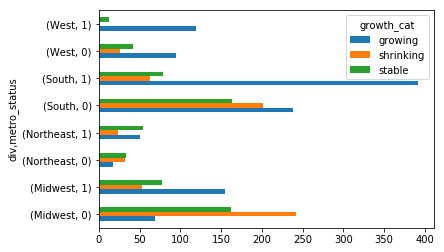

In [21]:
# group by census region and growth category, get descriptives for diversity
df.groupby(['div', 'metro_status', 'growth_cat']).size().unstack().plot(kind='barh')

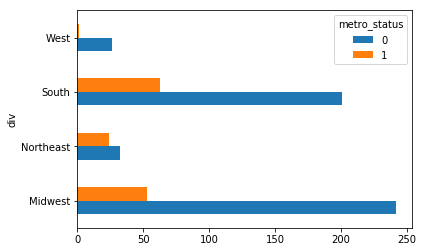

In [22]:
# group by census region and growth category, get descriptives for diversity
df.loc[df['growth_cat']=='shrinking'].groupby(['div', 'metro_status']).size().unstack().plot(kind='barh')

In [23]:
df.groupby(['div', 'growth_cat'])['seg2_90', 'seg2_00', 'seg2_10'].median()

seg2_90   seg2_00   seg2_10
div       growth_cat                              
Midwest   growing     0.053843  0.048141  0.050843
          shrinking   0.060520  0.054368  0.047442
          stable      0.054624  0.048108  0.044117
Northeast growing     0.078544  0.089045  0.089048
          shrinking   0.057811  0.066100  0.055163
          stable      0.119989  0.123116  0.112236
South     growing     0.109979  0.102801  0.096137
          shrinking   0.120754  0.118679  0.105444
          stable      0.104122  0.106247  0.091374
West      growing     0.061206  0.071572  0.069888
          shrinking   0.057340  0.053758  0.043464
          stable      0.060837  0.080436  0.086837

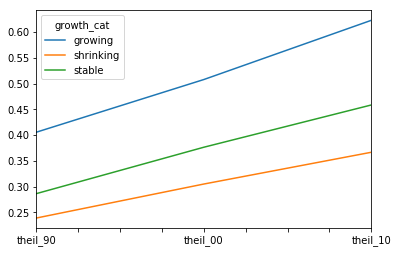

In [24]:
# plot change in diversity by growth category
df.groupby(['growth_cat'])['theil_90','theil_00', 'theil_10'].median().transpose().plot()

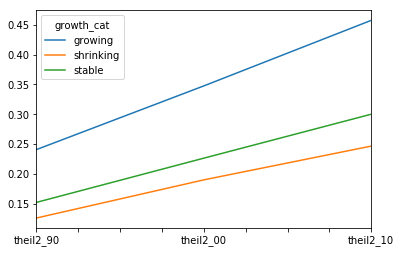

In [25]:
# plot change in diversity by growth category
df.groupby(['growth_cat'])['theil2_90','theil2_00', 'theil2_10'].median().transpose().plot()

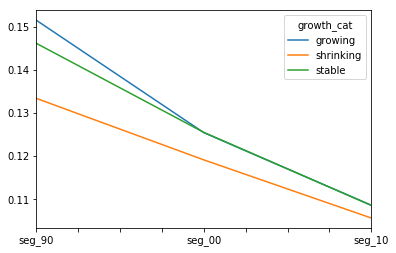

In [26]:
# plot change in segregation by growth category
df.groupby(['growth_cat'])['seg_90','seg_00', 'seg_10'].median().transpose().plot()

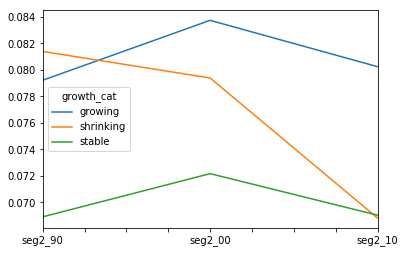

In [27]:
# plot change in segregation by growth category
df.groupby(['growth_cat'])['seg2_90','seg2_00', 'seg2_10'].median().transpose().plot()

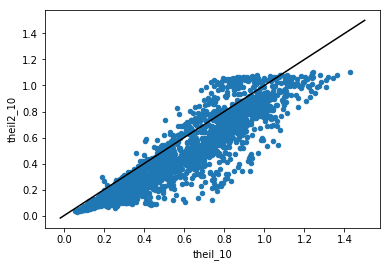

In [28]:
# plot change in diversity by growth category
ax=df.plot.scatter('theil_10', 'theil2_10')
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='black')

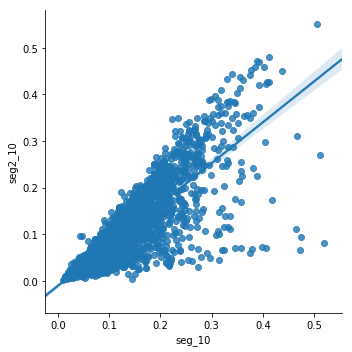

In [42]:
# ax=df.plot.scatter('seg_10', 'seg2_10')
# x = np.linspace(*ax.get_xlim())
# ax.plot(x, x, color='black')

sns.lmplot('seg_10', 'seg2_10', data=df)

In [44]:
# which counties had the largest drop in seg between 5 group and 3 group?

df.loc[(df['seg_10']>0.4) & (df['seg2_10'] < 0.3)][['state', 'county_name', 'seg_10', 'seg2_10', 'total_10', 'total2_10']]

,state,county_name,seg_10,seg2_10,total_10,total2_10
G0400010,AZ,Apache County,0.518378,0.080974,71518,18838
G0400070,AZ,Gila County,0.417354,0.174004,53597,45081
G0400170,AZ,Navajo County,0.465471,0.110619,107449,59594
G1701010,IL,Lawrence County,0.403710,0.297159,16833,16627
G2700070,MN,Beltrami County,0.406853,0.071239,44442,33993
G3600330,NY,Franklin County,0.510979,0.270106,51599,46980
G4900370,UT,San Juan County,0.473405,0.095110,14746,7144
G5501250,WI,Vilas County,0.472550,0.065896,21430,18845


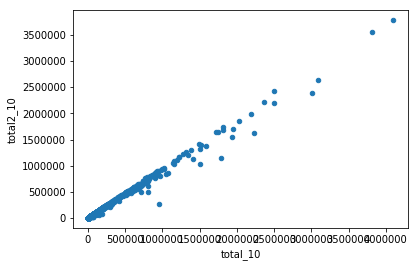

In [31]:
ax=df.loc[df['total_00']<5000000] .plot.scatter('total_10', 'total2_10')
# x = np.linspace(*ax.get_xlim())
# ax.plot(x, x, color='black')

segregation drops substantially in shrinking counties, esp. btw 2000 and 2010. which counties had the largest declines in segregation? __note that there is a different set of counties shrinking 1990 to 2000 and 2000 to 2010!__

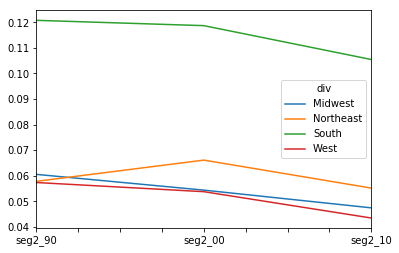

In [32]:
# plot change in segregation
df.loc[df['growth_cat']=='shrinking'].groupby(['div'])['seg2_90','seg2_00', 'seg2_10'].median().transpose().plot()

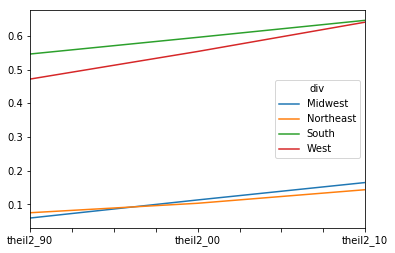

In [33]:
# plot change in diversity
df.loc[df['growth_cat']=='shrinking'].groupby(['div'])['theil2_90', 'theil2_00', 'theil2_10'].median().transpose().plot()

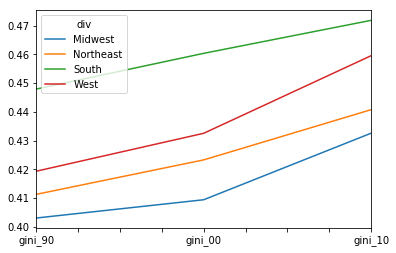

In [34]:
# plot change in gini
df.loc[df['growth_cat']=='shrinking'].groupby(['div'])['gini_90','gini_00', 'gini_10'].median().transpose().plot()

Text(0.5,1,u'non_metro')

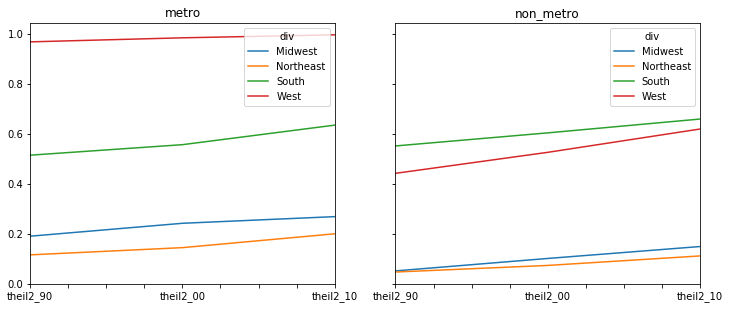

In [35]:
w = 12
h = (w * 0.8) * 1.0 / 2

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

# plot change in diversity
metro_shrinking = df.loc[(df['metro_status']==1) & (df['growth_cat']=='shrinking')]
metro_shrinking.groupby(['div'])['theil2_90', 'theil2_00', 'theil2_10'].median().transpose().plot(ax=ax1)
ax1.set_title('metro')

rural_shrinking = df.loc[(df['metro_status']==0) & (df['growth_cat']=='shrinking')]
rural_shrinking.groupby(['div'])['theil2_90', 'theil2_00', 'theil2_10'].median().transpose().plot(ax=ax2)
ax2.set_title('non_metro')

Text(0.5,1,u'non_metro')

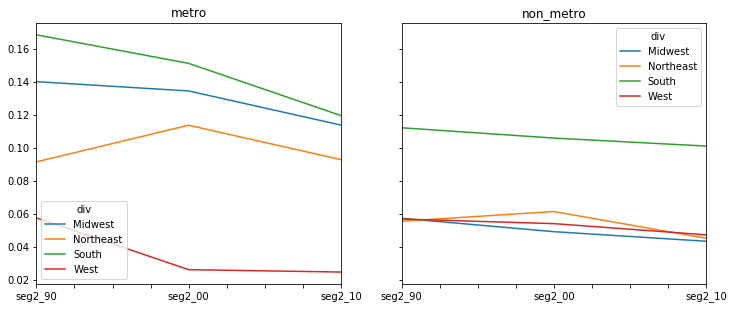

In [36]:
w = 12
h = (w * 0.8) * 1.0 / 2

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(w,h))

# plot change in diversity
metro_shrinking = df.loc[(df['metro_status']==1) & (df['growth_cat']=='shrinking')]
metro_shrinking.groupby(['div'])['seg2_90', 'seg2_00', 'seg2_10'].median().transpose().plot(ax=ax1)
ax1.set_title('metro')

rural_shrinking = df.loc[(df['metro_status']==0) & (df['growth_cat']=='shrinking')]
rural_shrinking.groupby(['div'])['seg2_90', 'seg2_00', 'seg2_10'].median().transpose().plot(ax=ax2)
ax2.set_title('non_metro')